# **Importing all the required libraries**

In [ ]:
# importing tabular data and matrices handlers
import pandas as pd
import numpy as np

# importing the dataset from sklearn
from sklearn.datasets import fetch_20newsgroups

# importing string operations
import re
import string
import nltk
from nltk.corpus import stopwords

# imporitng the convertor
from sklearn.feature_extraction.text import TfidfVectorizer

# importing classification models
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier

# importing clustering models
from sklearn.cluster import KMeans

# importing dimensionality reduction helper
from sklearn.decomposition import PCA

# importing evaluating metrics
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# importing word cloud helper
from wordcloud import WordCloud

# importing visualization packages
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure

# importing hyperparameter tuning package
from sklearn.model_selection import GridSearchCV

#importing to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# configuring visualizations
%matplotlib inline
mpl.style.use( 'ggplot' )
plt.style.use('fivethirtyeight')
sns.set(context="notebook", palette="dark", style = 'whitegrid' , color_codes=True)
params = { 
    'axes.labelsize': "large",
    'xtick.labelsize': 'x-large',
    'legend.fontsize': 20,
    'figure.dpi': 150,
    'figure.figsize': [25, 7]
}
plt.rcParams.update(params)

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# **Operating on 17 Individual Newsgroups**

In [ ]:

categories = [
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc'
]

In [ ]:
total_training_data = fetch_20newsgroups(subset='train', categories=categories, remove=('headers', 'footers', 'quotes'), shuffle=True)
total_testing_data = fetch_20newsgroups(subset='test', categories=categories, remove=('headers', 'footers', 'quotes'),shuffle=True)

In [ ]:
print("Total training data:",len(total_training_data['data']))
print("Total testing data:",len(total_testing_data['data']))

Total training data: 9650
Total testing data: 6425


In [ ]:
def count_per_class(training_data, categories):
  """
  Function to return the number of documents per class
  """
  count_list=[]
  for i in range(len(categories)):
    boolean_value=(training_data['target'] == i)
    count=0
    for i in boolean_value:
      if i==True:
        count+=1
    count_list.append(count)
  class_count = {}
  for i in range(len(count_list)):
    class_count[categories[i]]=count_list[i]
  return class_count

In [ ]:
count_per_category = count_per_class(total_training_data,categories)
count_per_category

{'comp.graphics': 584,
 'comp.os.ms-windows.misc': 591,
 'comp.sys.ibm.pc.hardware': 590,
 'comp.sys.mac.hardware': 578,
 'comp.windows.x': 593,
 'rec.autos': 594,
 'rec.motorcycles': 598,
 'rec.sport.baseball': 597,
 'rec.sport.hockey': 600,
 'sci.crypt': 595,
 'sci.electronics': 591,
 'sci.med': 594,
 'sci.space': 593,
 'talk.politics.guns': 546,
 'talk.politics.mideast': 564,
 'talk.politics.misc': 465,
 'talk.religion.misc': 377}

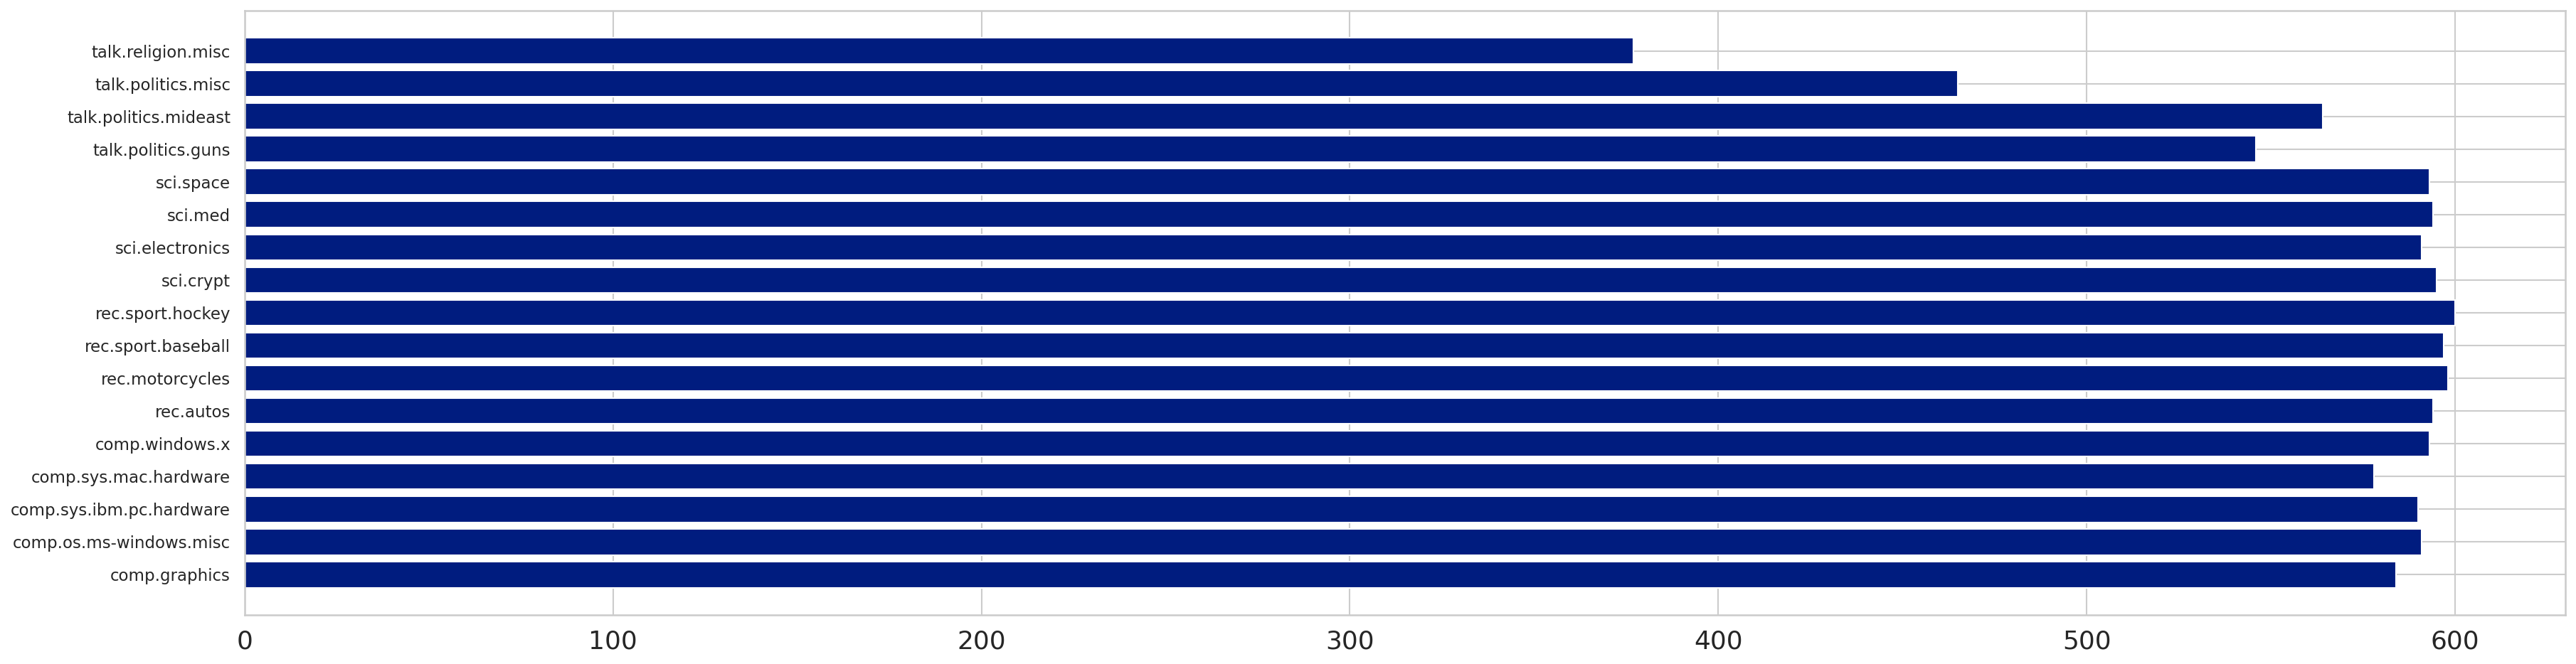

In [ ]:
category = list(count_per_category.keys())
count = list(count_per_category.values())
plt.barh(range(len(count_per_category)), count, tick_label=category)
plt.show()

**Plot Analysis**

The above plot illustrates the number of documents per topic, wherein the topic named rec.sport.hockey has the highest number of documents, while the topic named talk.religion.misc has the lowest number of documents.

In [ ]:
X_train_data = pd.DataFrame(total_training_data['data'], columns=["post"])
y_train = pd.DataFrame(total_training_data['target'])
X_test_data = pd.DataFrame(total_testing_data['data'], columns=["post"])
y_test = pd.DataFrame(total_testing_data['target'])

In [ ]:
X_train_data

post
0     \n\nThere were many injustices in the middle a...
1     \n\nThis actually supports Bill's speculation ...
2     \nApplied Engineering makes a NuBus card calle...
3     Mark McWiggins <markmc@halcyon.com> reminds us...
4     \nExcellently put!\n\nEven as a libertarian, I...
...                                                 ...
9645  \nAll Toyotas have airbags with a real horn. C...
9646    HELP!\nMaybe anybody know names of conferenc...
9647  \nI'm not aware that the US government conside...
9648  \n  Nut or not, he was clearly a liar.  He sai...
9649  \nIt likely has nothing to do with "chunks of ...

[9650 rows x 1 columns]

In [ ]:
y_test

0
0     10
1     12
2      4
3     13
4      2
...   ..
6420   0
6421  12
6422   2
6423  15
6424   6

[6425 rows x 1 columns]

## **Data Preprocessing**

In [ ]:
def preprocess_post(post):
  """
  Function to preprocess the post which involves removing URL,
  removing special characters, numbers, extra spaces, etc
  """
  post = re.sub(r'\S*https?:\S*', '', post)
  post = re.sub('[^A-Za-z]+', ' ', post)

  altered_post_words = []
  for word in post.split():
    if word.lower() not in stopwords.words("english"):
      altered_post_words.append(word)
  
  post = ' '.join(altered_post_words)

  post = post.lower()

  post = post.strip()

  return post

In [ ]:
X_train_data['preprocessed_post'] = X_train_data['post'].apply(lambda x: preprocess_post(x))

In [ ]:
X_train_data

post  \
0     \n\nThere were many injustices in the middle a...   
1     \n\nThis actually supports Bill's speculation ...   
2     \nApplied Engineering makes a NuBus card calle...   
3     Mark McWiggins <markmc@halcyon.com> reminds us...   
4     \nExcellently put!\n\nEven as a libertarian, I...   
...                                                 ...   
9645  \nAll Toyotas have airbags with a real horn. C...   
9646    HELP!\nMaybe anybody know names of conferenc...   
9647  \nI'm not aware that the US government conside...   
9648  \n  Nut or not, he was clearly a liar.  He sai...   
9649  \nIt likely has nothing to do with "chunks of ...   

                                      preprocessed_post  
0     many injustices middle ages truely sad would h...  
1     actually supports bill speculation backdoor rs...  
2     applied engineering makes nubus card called qu...  
3     mark mcwiggins markmc halcyon com reminds us m...  
4     excellently put even libertarian admit governm...  
...                                                 ...  
9645  toyotas airbags real horn come hard put little...  
9646  help maybe anybody know names conferences plea...  
9647  aware us government considers dangerous case n...  
9648  nut clearly liar said would surrender local ra...  
9649  likely nothing chunks plaque sounds like may n...  

[9650 rows x 2 columns]

## **Vectorization**

In [ ]:
vectorizer = TfidfVectorizer(min_df=5, max_df=0.95)

X_train = vectorizer.fit_transform(X_train_data['preprocessed_post'])
X_test = vectorizer.transform(X_test_data['post'])

In [ ]:
X_train.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## **K-Means Clustering**

### **Determining k - Elbow Method**

In [ ]:
# calculating inertia to determine the optimal value of k i.e. number of clusters
inertia = []
for k in range(1,6):
   kmeans = KMeans(n_clusters=k, max_iter=300, n_init=10)
   kmeans = kmeans.fit(X_train)
   inertia.append(kmeans.inertia_)

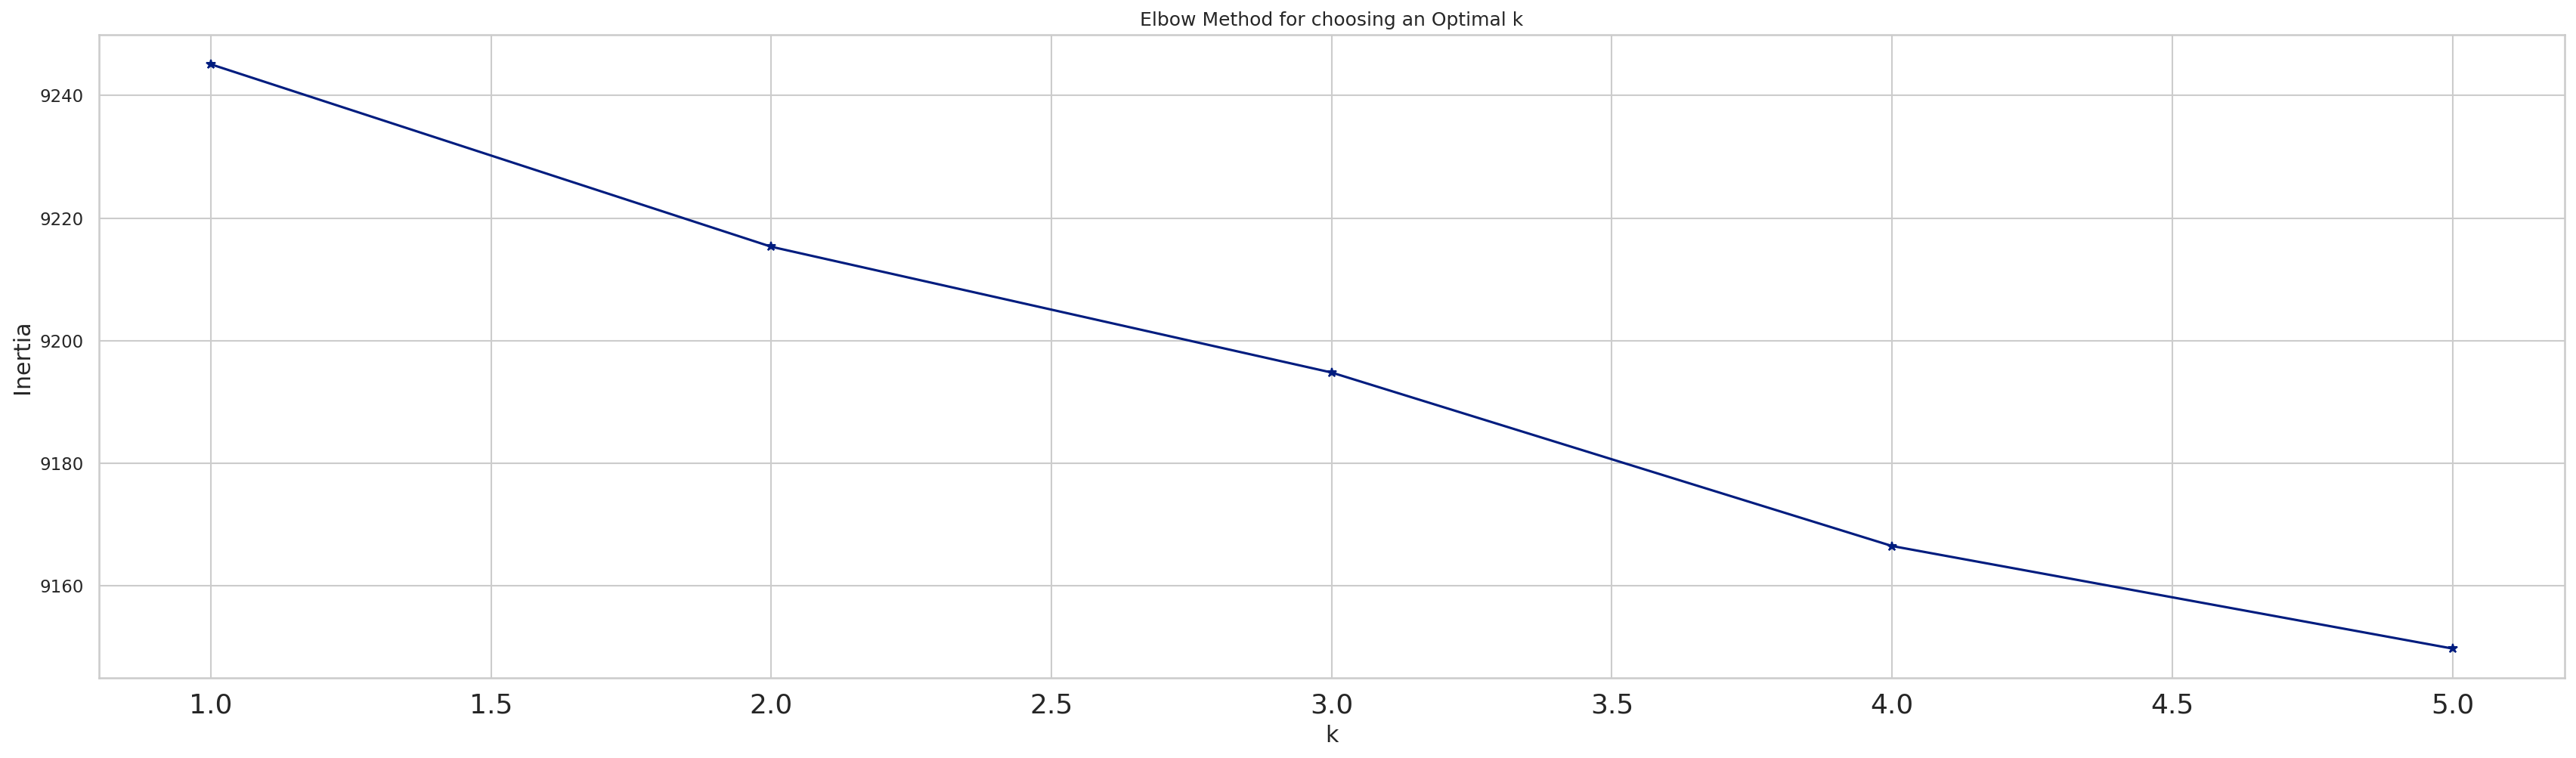

In [ ]:
# plotting the results to get the elbow point
plt.plot(range(1,6), inertia, '*-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method for choosing an Optimal k')
plt.show()

**Plot Analysis**

The plot illustrates the line that helps in choosing the elbow point. It can be observed that the sum of squared errors (inertia) does not improve much after point K = 4. Hence, 4 is chosen to be the number of clusters and each document is assigned to one of the clusters using the K-Means algorithm. This value of K matches the number of topics that are there after clubbing i.e. 4.

In [ ]:
chosen_k = 4

### **Applying K-Means Algorithm**

In [ ]:
# initializing kmeans with chosen_k centroids
kmeans = KMeans(n_clusters=chosen_k, init='k-means++', max_iter=200, n_init=10)

# fitting the model to the training data
kmeans.fit(X_train)

KMeans(max_iter=200, n_clusters=4)

In [ ]:
# storing the cluster labels
cluster_label = kmeans.labels_

In [ ]:
# viewing the cluster labels
cluster_label

array([2, 2, 0, ..., 2, 2, 3], dtype=int32)

# **Principal Component Analysis (PCA)**

In [ ]:
# viewing the shape of the training data
X_train.shape

(9650, 14798)

### **Applying PCA**

In [ ]:
# initializing PCA with 2 components
pca = PCA(n_components=2, random_state=42)

# reducing the dimensionality
component_vectors = pca.fit_transform(X_train.toarray())

In [ ]:
# viewing the component vectors
component_vectors

array([[-0.10248158, -0.07648162],
       [-0.02988199, -0.02329773],
       [ 0.03859736, -0.03686536],
       ...,
       [-0.08154973, -0.07743482],
       [-0.05135026,  0.02550783],
       [-0.03210275,  0.36567149]])

In [ ]:
# storing the two dimensions
dimension_one = component_vectors[:, 0]
dimension_two = component_vectors[:, 1]

In [ ]:
# creating a new dataframe with details of allotted cluster and new dimensions
df_dimension_reduced_cluster = pd.DataFrame({'post' : X_train_data['post'], 'preprocessed_post' : X_train_data['preprocessed_post'], 'dimension_one' : dimension_one, 'dimension_two' : dimension_two, 'cluster_label' : cluster_label})

In [ ]:
# viewing the new dimensionaly reduced clustered dataframe
df_dimension_reduced_cluster

post  \
0     \n\nThere were many injustices in the middle a...   
1     \n\nThis actually supports Bill's speculation ...   
2     \nApplied Engineering makes a NuBus card calle...   
3     Mark McWiggins <markmc@halcyon.com> reminds us...   
4     \nExcellently put!\n\nEven as a libertarian, I...   
...                                                 ...   
9645  \nAll Toyotas have airbags with a real horn. C...   
9646    HELP!\nMaybe anybody know names of conferenc...   
9647  \nI'm not aware that the US government conside...   
9648  \n  Nut or not, he was clearly a liar.  He sai...   
9649  \nIt likely has nothing to do with "chunks of ...   

                                      preprocessed_post  dimension_one  \
0     many injustices middle ages truely sad would h...      -0.102482   
1     actually supports bill speculation backdoor rs...      -0.029882   
2     applied engineering makes nubus card called qu...       0.038597   
3     mark mcwiggins markmc halcyon com reminds us m...      -0.065279   
4     excellently put even libertarian admit governm...      -0.077332   
...                                                 ...            ...   
9645  toyotas airbags real horn come hard put little...      -0.030194   
9646  help maybe anybody know names conferences plea...       0.049998   
9647  aware us government considers dangerous case n...      -0.081550   
9648  nut clearly liar said would surrender local ra...      -0.051350   
9649  likely nothing chunks plaque sounds like may n...      -0.032103   

      dimension_two  cluster_label  
0         -0.076482              2  
1         -0.023298              2  
2         -0.036865              0  
3         -0.033008              2  
4         -0.061666              2  
...             ...            ...  
9645       0.013118              1  
9646       0.005997              1  
9647      -0.077435              2  
9648       0.025508              2  
9649       0.365671              3  

[9650 rows x 5 columns]

# **Visualization**

### **Most frequent words**

In [ ]:
number_of_terms = 23

# grouping the tf-idf vector by cluster label
df_cluster_group = pd.DataFrame(X_train.todense()).groupby(cluster_label).mean()

# accessing terms of tf-idf vector
terms = vectorizer.get_feature_names_out() 
for i,r in df_cluster_group.iterrows():
  print(f'\nCluster {i}')
  print(', '.join([terms[t] for t in np.argsort(r)[-number_of_terms:]]))


Cluster 0
pc, mb, one, hi, problem, help, system, program, get, advance, files, mail, dos, file, use, would, please, drive, know, card, anyone, thanks, windows

Cluster 1
need, see, want, used, could, may, well, much, com, time, good, new, also, think, anyone, car, edu, use, know, get, would, like, one

Cluster 2
much, also, good, law, many, see, say, time, make, well, right, even, us, could, know, key, get, like, think, government, one, would, people

Cluster 3
jxp, chastity, dsl, intellect, geb, nhl, one, pitt, good, would, teams, win, think, league, last, play, hockey, season, players, games, year, team, game


In [ ]:
# mapping clusters to the appropriate categories 
cluster_map = {0: "Computer", 1: "Science", 2: "Talk", 3: 'Recreation'}

# applying mappping to create a new column that stores the category to which the document belongs
df_dimension_reduced_cluster['cluster'] = df_dimension_reduced_cluster['cluster_label'].map(cluster_map)

In [ ]:
# viewing the newly added column i.e. cluster to see the category of each document
df_dimension_reduced_cluster

post  \
0     \n\nThere were many injustices in the middle a...   
1     \n\nThis actually supports Bill's speculation ...   
2     \nApplied Engineering makes a NuBus card calle...   
3     Mark McWiggins <markmc@halcyon.com> reminds us...   
4     \nExcellently put!\n\nEven as a libertarian, I...   
...                                                 ...   
9645  \nAll Toyotas have airbags with a real horn. C...   
9646    HELP!\nMaybe anybody know names of conferenc...   
9647  \nI'm not aware that the US government conside...   
9648  \n  Nut or not, he was clearly a liar.  He sai...   
9649  \nIt likely has nothing to do with "chunks of ...   

                                      preprocessed_post  dimension_one  \
0     many injustices middle ages truely sad would h...      -0.102482   
1     actually supports bill speculation backdoor rs...      -0.029882   
2     applied engineering makes nubus card called qu...       0.038597   
3     mark mcwiggins markmc halcyon com reminds us m...      -0.065279   
4     excellently put even libertarian admit governm...      -0.077332   
...                                                 ...            ...   
9645  toyotas airbags real horn come hard put little...      -0.030194   
9646  help maybe anybody know names conferences plea...       0.049998   
9647  aware us government considers dangerous case n...      -0.081550   
9648  nut clearly liar said would surrender local ra...      -0.051350   
9649  likely nothing chunks plaque sounds like may n...      -0.032103   

      dimension_two  cluster_label     cluster  
0         -0.076482              2        Talk  
1         -0.023298              2        Talk  
2         -0.036865              0    Computer  
3         -0.033008              2        Talk  
4         -0.061666              2        Talk  
...             ...            ...         ...  
9645       0.013118              1     Science  
9646       0.005997              1     Science  
9647      -0.077435              2        Talk  
9648       0.025508              2        Talk  
9649       0.365671              3  Recreation  

[9650 rows x 6 columns]

## **Clusters**

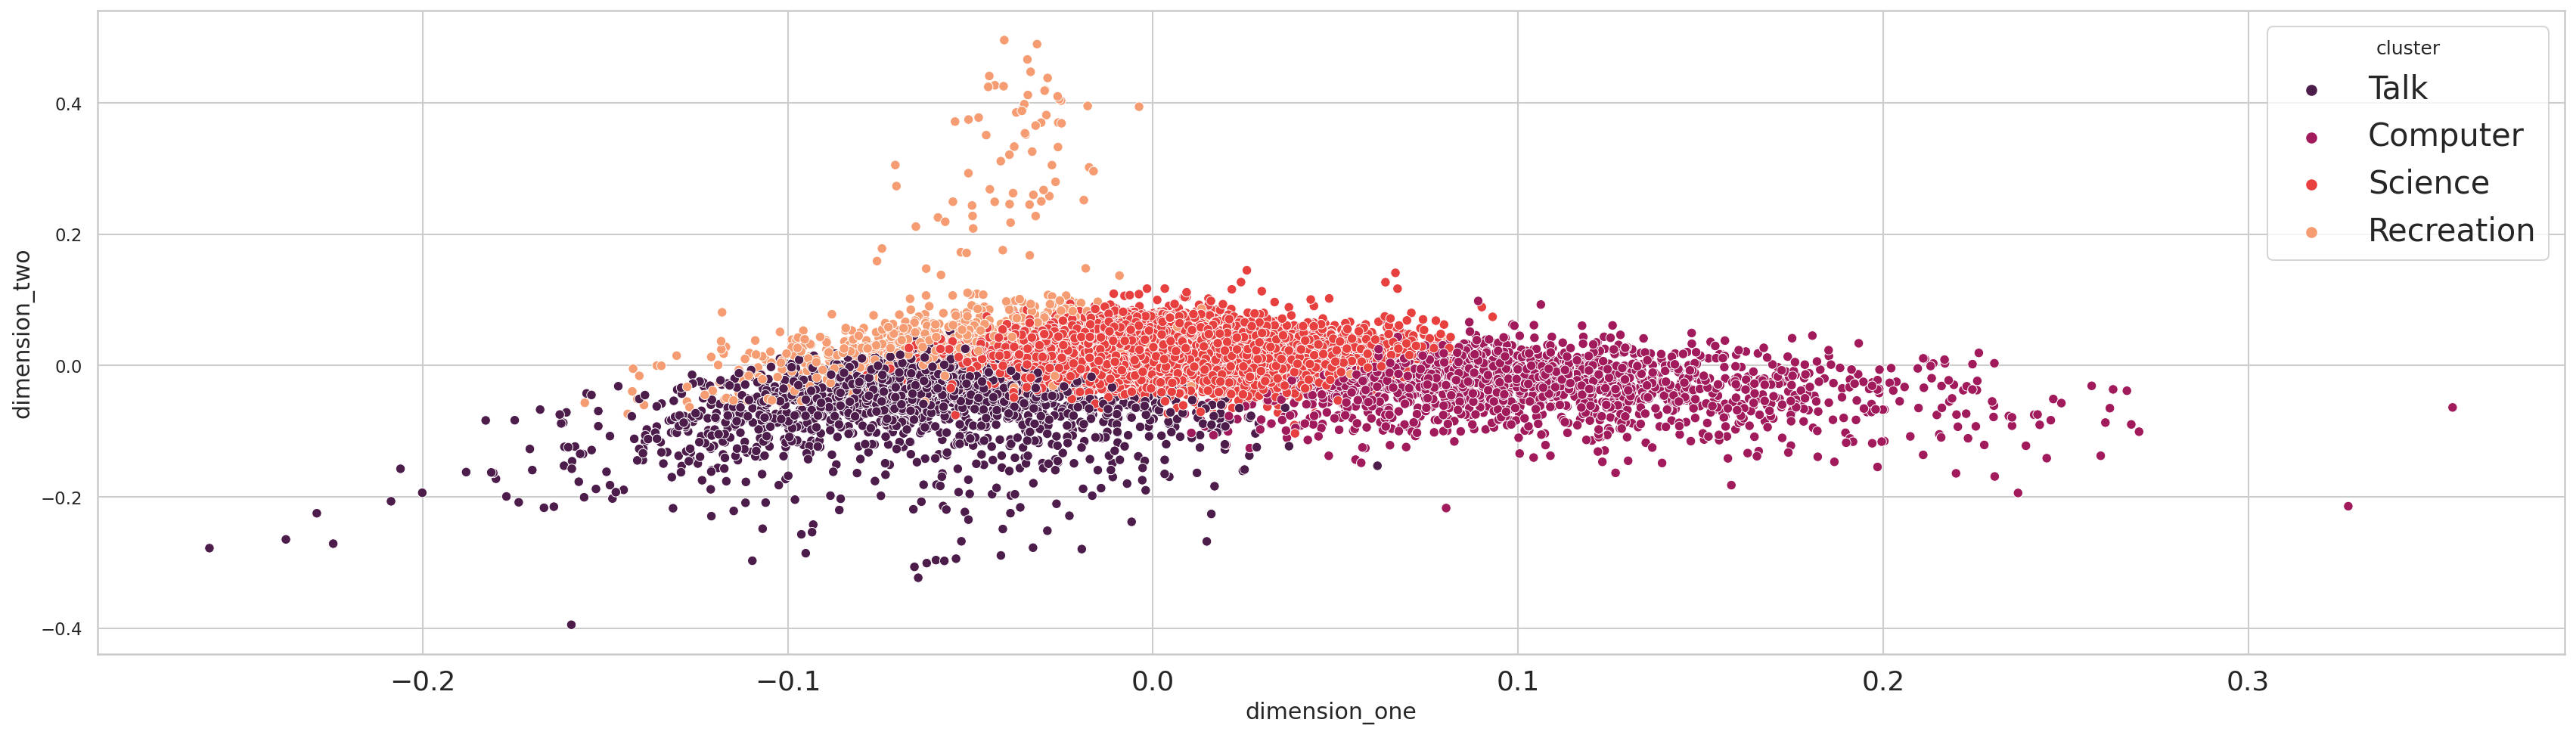

In [ ]:
# visualizing the clusters formed after kmeans and pca
sns.scatterplot(data=df_dimension_reduced_cluster, x='dimension_one', y='dimension_two', hue='cluster', palette="rocket")

**Analysis**

- Because of the reduced dimensionality, it is possible be see the 4 clusters that are formed in the 2D space. The 4 clusters correspond to the 4 clubbed groups i.e. Talk, Computer, Science, and Recreation.
- There is some overlap between the clusters of different topics. This is because there are common words that are present in the documents that belong to different topics. For instance, considering Science and Recreation clusters, words such as good, think, and one are present in the documents that belong to both the topics. Another instance is for the word think that appears in documents that belong to three of the topics i.e. Talk, Science, and Recreation.

## **Word Cloud**

Cluster Label: 0 Cluster Name: Computer


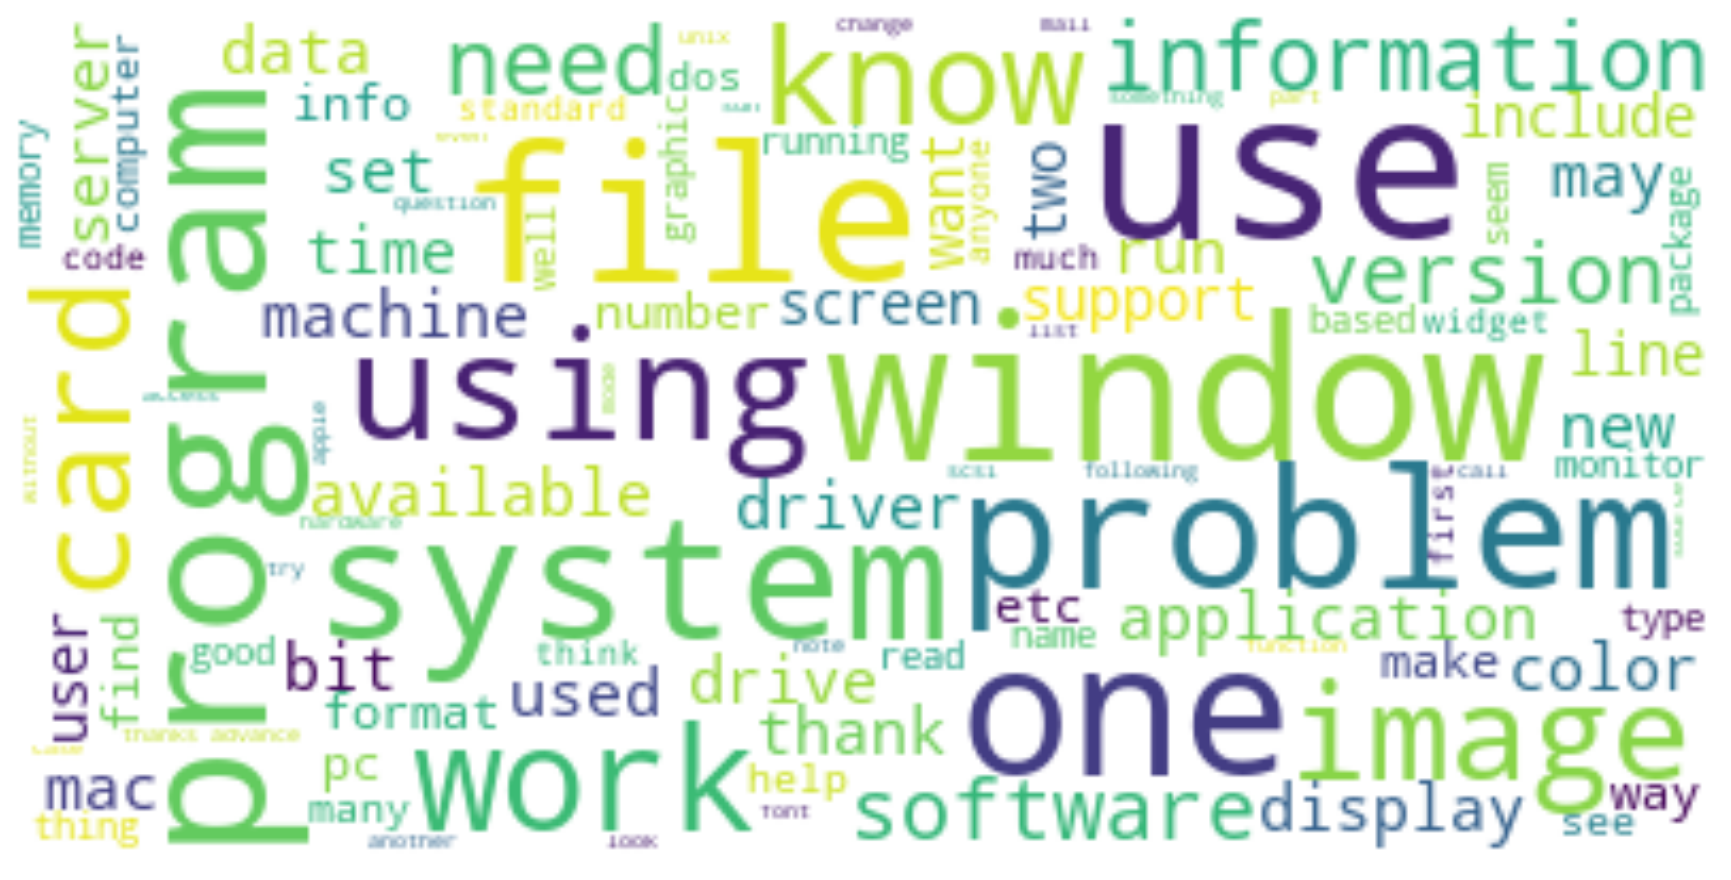

Cluster Label: 1 Cluster Name: Science


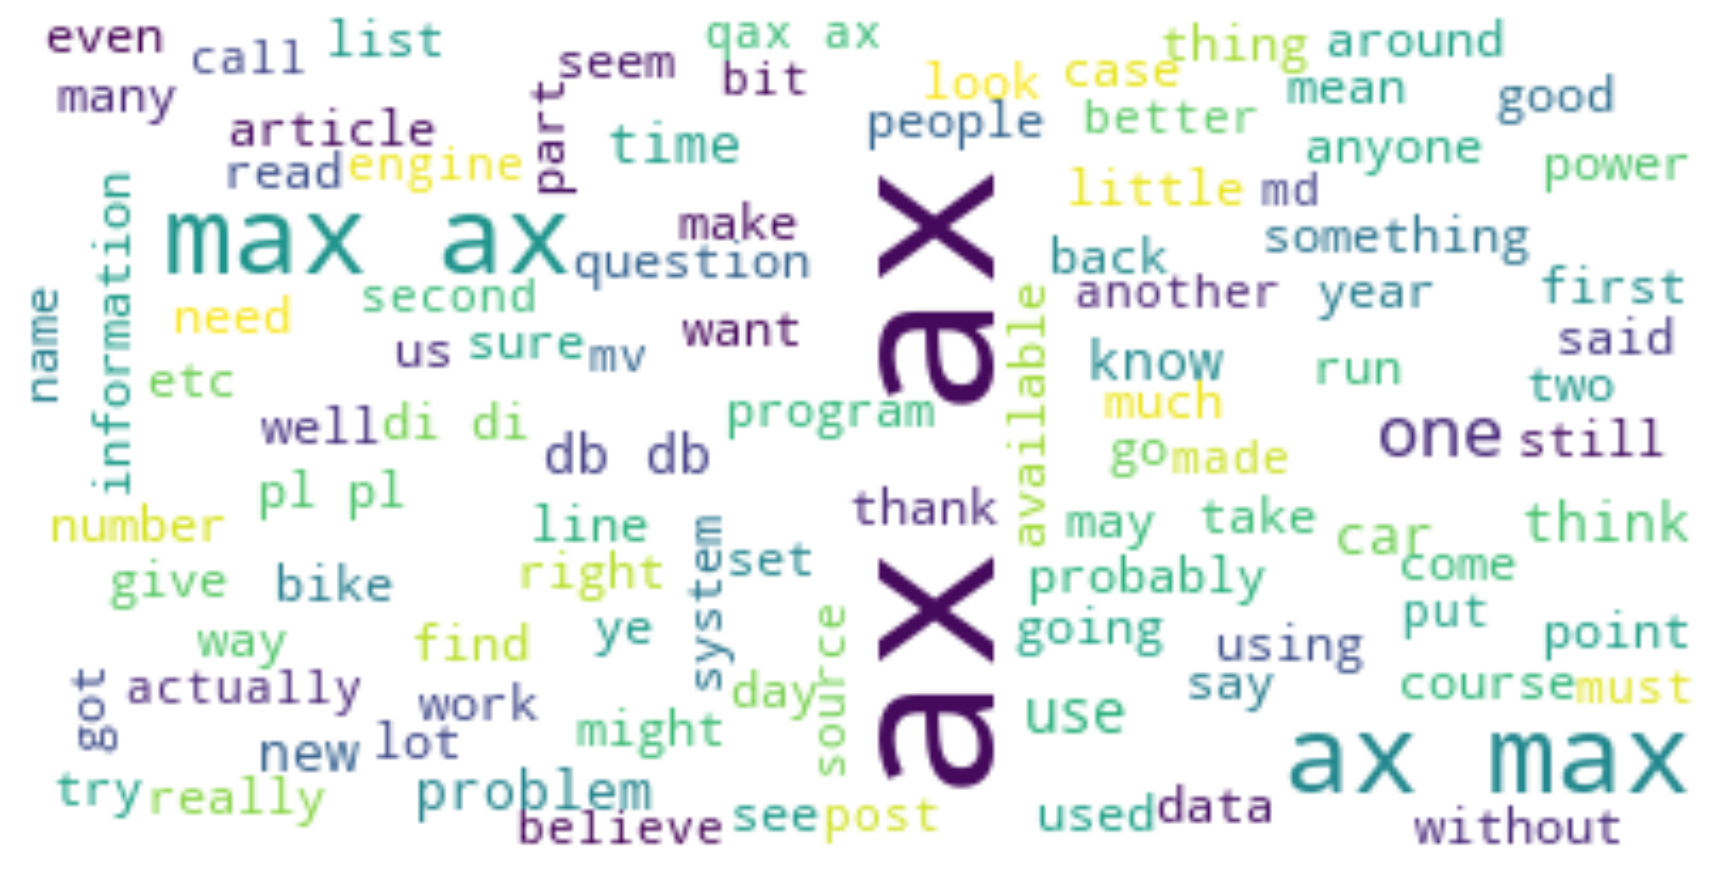

Cluster Label: 2 Cluster Name: Talk


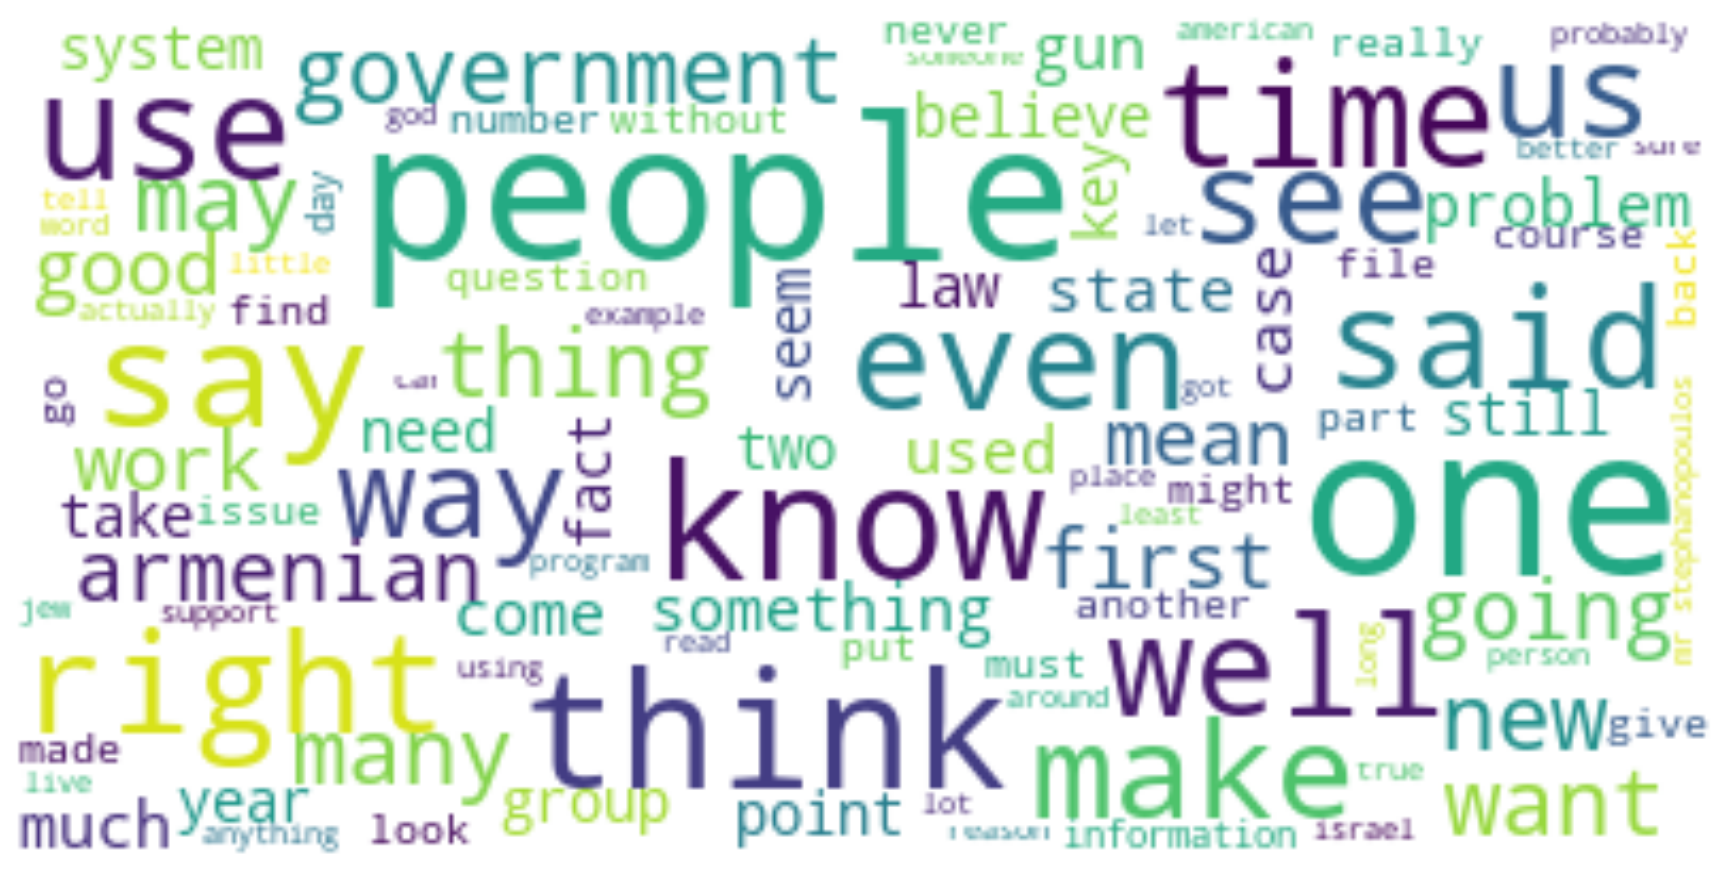

Cluster Label: 3 Cluster Name: Recreation


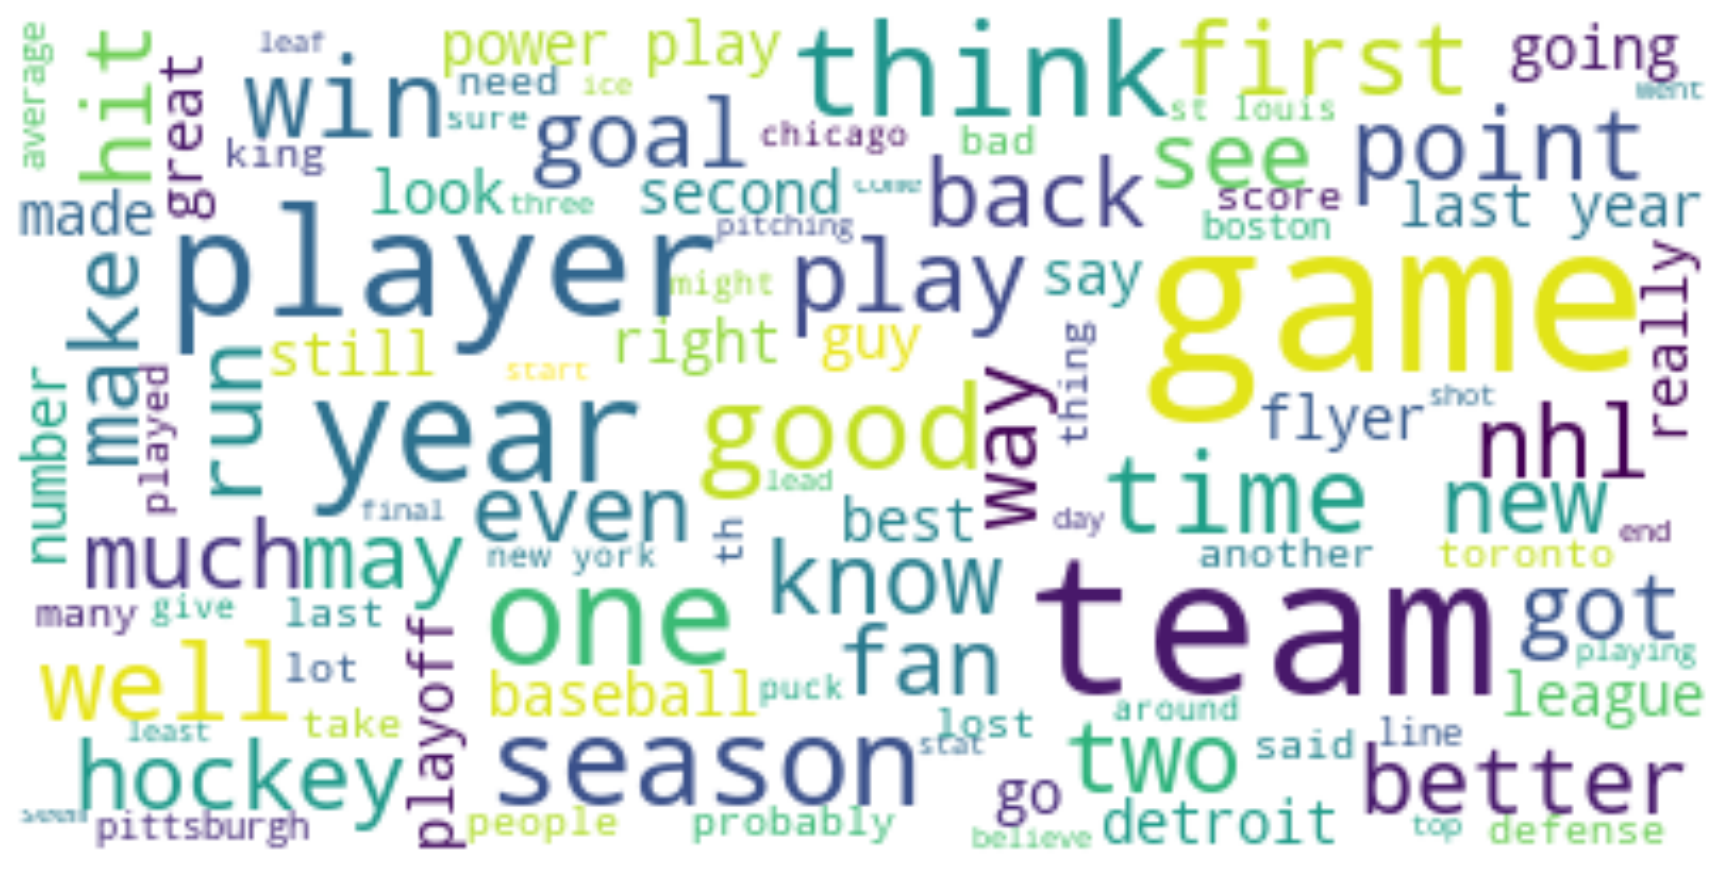

In [ ]:
# viewing the wordcloud for each of the clusters
for k in range(0,chosen_k):
   df_matched_clusters=df_dimension_reduced_cluster[df_dimension_reduced_cluster['cluster_label']==k]
   text=df_matched_clusters['preprocessed_post'].str.cat(sep=' ')
   text=text.lower()
   text=' '.join([word for word in text.split()])
   wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
   print(f'Cluster Label: {k} Cluster Name: {cluster_map[k]}')
   plt.figure()
   plt.imshow(wordcloud, interpolation="bilinear")
   plt.axis("off")
   plt.show()

The word cloud is created and visualized for each of the clusters. The words which are appearing repeatedly are big in size and the occurrence or importance of the word is directly proportional to the size of the word.